In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import datetime
from __future__ import print_function, division, absolute_import
%matplotlib inline
pd.options.display.max_rows = 10

In [16]:
try:
    import multiprocessing
except ImportError:
    pass

import sys

from setuptools import setup, find_packages

### **Exercise 2.1**

In [3]:
df = pd.DataFrame.from_csv('2013_movies.csv',header=0,index_col=None)
df

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00
...,...,...,...,...,...,...,...
95,Rush,38000000.0,26947624,Ron Howard,R,123,9/20/13 0:00
96,The Host,40000000.0,26627201,Andrew Niccol,PG-13,125,3/29/13 0:00
97,The World's End,20000000.0,26004851,Edgar Wright,R,109,8/23/13 0:00
98,21 and Over,13000000.0,25682380,Jon LucasScott Moore,R,93,3/1/13 0:00


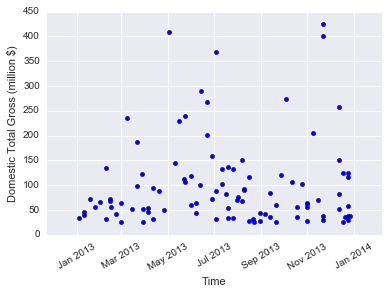

In [4]:
time = np.array(pd.to_datetime(df.ReleaseDate))
gross = np.array(df.DomesticTotalGross)
plt.scatter(time,gross/1e6)
plt.xlabel('Time')
plt.ylabel('Domestic Total Gross (million $)')
plt.xticks(rotation=30);

### Exercise 2.2

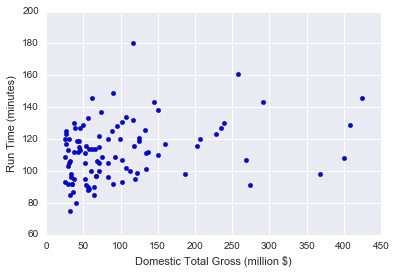

In [6]:
runtime = np.array(df.Runtime)
plt.scatter(gross/1e6,runtime)
plt.ylabel('Run Time (minutes)')
plt.xlabel('Domestic Total Gross (million $)');

### Exercise 2.3 

In [30]:
import itertools
from itertools import *
colors = next(itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])
RatingsList = df.Rating.unique()
for category in RatingsList:
    color = colors.next()
    group = df.Rating == category
    runtime = np.array(df.Runtime[group])
    gross = np.array(df.DomesticTotalGross[group])
    plt.scatter(gross/1e6,runtime,c=color,label=category)
plt.legend(loc=[1,.7])
plt.ylabel('Run Time (minutes)')
plt.xlabel('Domestic Total Gross (million $)');

SyntaxError: invalid syntax (<ipython-input-30-03a80fa91d6e>, line 4)

### Exercise 2.4

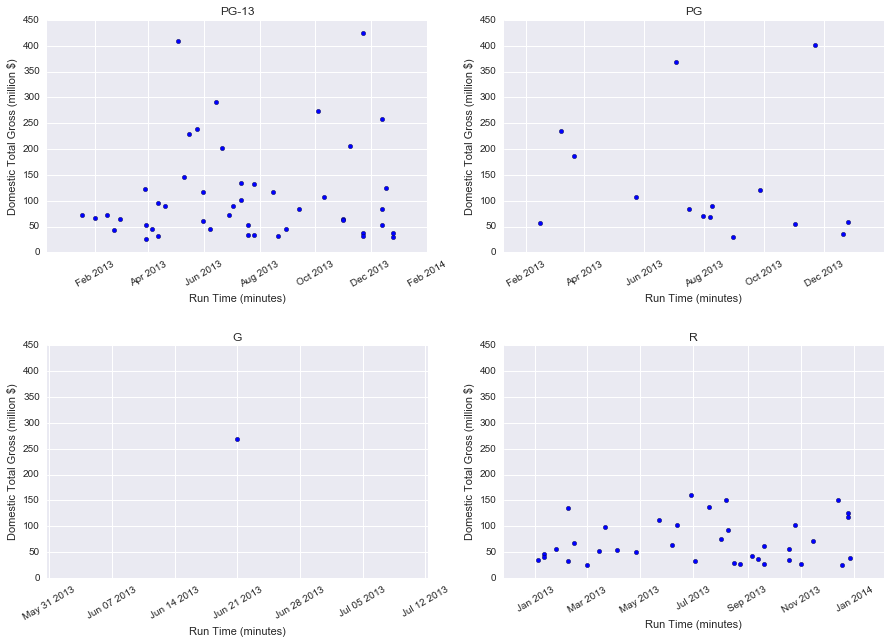

In [9]:
fig = plt.subplots(2, 2, figsize=(15, 10))
plt.subplots_adjust(hspace=.4)
for i in range(len(RatingsList)):
    category = RatingsList[i]
    group = df.Rating == category
    gross = np.array(df.DomesticTotalGross[group])/1e6
    time = np.array(pd.to_datetime(df.ReleaseDate[group]))
    plt.subplot(2, 2, i+1)
    plt.scatter(time,gross,label=category)
    plt.title(category)
    plt.xlabel('Run Time (minutes)')
    plt.xticks(rotation=30);
    plt.ylim([0,450])
    plt.ylabel('Domestic Total Gross (million $)');

### Exercise 2.5

In [18]:
df.groupby(['Director']).mean().sort_values('DomesticTotalGross', ascending = False)

,Budget,DomesticTotalGross,Runtime
Director,,,
Francis Lawrence,130000000.0,424668047.0,146.0
Shane Black,200000000.0,409013994.0,129.0
Chris BuckJennifer Lee,150000000.0,400738009.0,108.0
Pierre CoffinChris Renaud,76000000.0,368061265.0,98.0
Zack Snyder,225000000.0,291045518.0,143.0
...,...,...,...
Ron Howard,38000000.0,26947624.0,123.0
Andrew Niccol,40000000.0,26627201.0,125.0
Edgar Wright,20000000.0,26004851.0,109.0


### Exercise 2.6

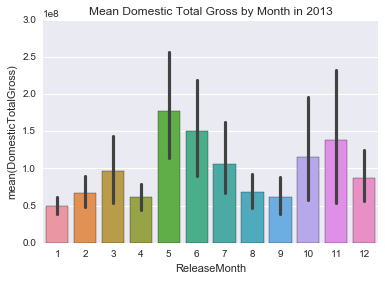

In [20]:
Release_Month = df.ReleaseDate.apply(lambda x:pd.to_datetime(x).month)
Release_Month.name = "ReleaseMonth"
dfnew = pd.concat([df,ReleaseMonth],axis=1)
ax = plt.axes()
sb.barplot(x=dfnew['ReleaseMonth'].sort_values(), y=dfnew['DomesticTotalGross'])
ax.set_title('Mean Domestic Total Gross by Month in 2013')